In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("data.csv", on_bad_lines='skip')

In [9]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [10]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [16]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

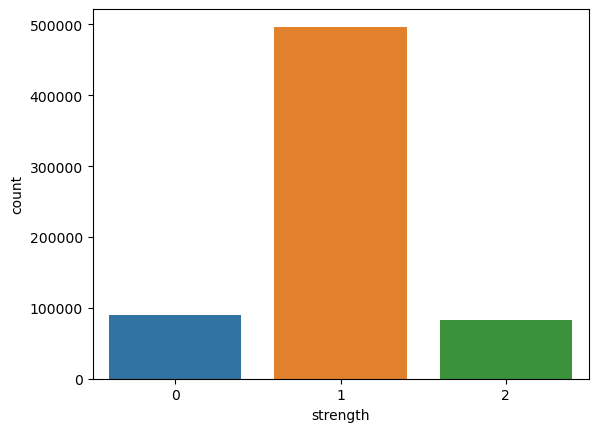

In [19]:
sns.countplot(data['strength'])

In [23]:
password_tuple= np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [24]:
import random 
random.shuffle(password_tuple)

In [32]:
x= [labels[0] for labels in password_tuple]
y= [labels[1] for labels in password_tuple]

In [34]:
def word_divide_char(input):
    char=[]
    for i in input:
        char.append(i)
    return char


In [36]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [40]:
X=vectorizer.fit_transform(x)

In [44]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x0f',
 '\x10',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '¡',
 '¤',
 '¦',
 '¨',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '™']

In [45]:
first_document_vector= X[0]

In [46]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56741247],
        [0.        ],
        [0.59080221],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [55]:
df=pd.DataFrame(first_document_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["TF_IDF"])
df.sort_values(by=['TF_IDF'], ascending=False)

,TF_IDF
7,0.590802
5,0.567412
z,0.336407
k,0.292015
d,0.285728
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [58]:
x_train.shape

(535711, 127)

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf=LogisticRegression(random_state=0, multi_class='multinomial')


In [62]:
clf.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [64]:
dt=np.array(['@#$132435YTr'])

In [65]:
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [66]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

# perfromance of our model

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [68]:
cm=confusion_matrix(y_test, y_pred)
asc=accuracy_score(y_test, y_pred)
print(cm)
print(asc)

[[ 5203 12853    17]
 [ 3547 93099  2515]
 [   38  5295 11361]]
0.8188205603010573


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     18073
           1       0.84      0.94      0.88     99161
           2       0.82      0.68      0.74     16694

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

